<a href="https://colab.research.google.com/github/pro8mari/code-practice/blob/main/Looping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.9/469.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.3 which is incompatible.


In [4]:
from typing import Dict, List, TypedDict
import random
from langgraph.graph import StateGraph, END

In [5]:
class AgentState(TypedDict):
  name: str
  number: List[int]
  counter: int

In [6]:
def greeting_node(state: AgentState)-> AgentState:
  """Greeting Node which says hi to the person"""
  state['name'] = f"Hi there, {state['name']}"
  state['counter'] = 0
  return state

def random_node(state: AgentState)-> AgentState:
  """Generates a random number from 0 to 10"""
  state['number'].append(random.randint(0,10))
  state['counter']+= 1
  return state

def should_continue(state: AgentState) -> AgentState:
   """Function to decide what to do next"""
   if state['counter'] < 5:
    print("ENTERING LOOP", state['counter'])
    return "loop"
   else:
    return "exit"


In [9]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges("random",
                           should_continue,
                            {"loop": "random",
                             "exit": END

                            })
graph.set_entry_point("greeting")
app = graph.compile()

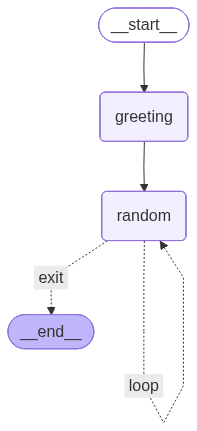

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Vaibhav', 'number': [3, 2, 6, 7, 9], 'counter': 5}